In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("/content/Health_insurance_cost.xlsx")
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

,0
age,28
gender,0
BMI,23
Children,0
smoking_status,0
location,0
health_insurance_price,2


In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1309.000000,1314.000000,1337.000000,1335.000000
mean,39.181818,30.638253,1.095737,13277.238554
std,14.049681,6.112628,1.205571,12113.150034
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.205000,0.000000,4746.698450
50%,39.000000,30.305000,1.000000,9386.161300
75%,51.000000,34.580000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.describe(include='object')

,gender,smoking_status,location
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


# i am filling missing values in columns

In [10]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [11]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [12]:
df['health_insurance_price'].fillna(df['health_insurance_price'].median(),inplace=True)

In [13]:
df.isnull().sum()

,0
age,0
gender,0
BMI,0
Children,0
smoking_status,0
location,0
health_insurance_price,0


In [14]:
df.shape

(1337, 7)

In [15]:
for i in df.columns:
  print(i,df[i].value_counts())
  print('*'*100)

age age
18.000000    68
19.000000    66
50.000000    29
46.000000    29
20.000000    29
48.000000    29
39.181818    28
51.000000    28
47.000000    28
49.000000    28
53.000000    28
26.000000    28
22.000000    28
24.000000    28
23.000000    28
28.000000    28
27.000000    28
52.000000    27
30.000000    27
40.000000    27
21.000000    27
54.000000    27
45.000000    27
42.000000    27
43.000000    27
41.000000    26
29.000000    26
56.000000    26
25.000000    26
44.000000    26
31.000000    25
37.000000    25
57.000000    25
33.000000    25
58.000000    25
36.000000    25
38.000000    25
59.000000    25
34.000000    25
39.000000    25
35.000000    24
32.000000    24
55.000000    24
61.000000    23
60.000000    23
64.000000    22
62.000000    22
63.000000    21
Name: count, dtype: int64
****************************************************************************************************
gender gender
male      675
female    662
Name: count, dtype: int64
*****************************

In [16]:
df.nunique()

,0
age,48
gender,2
BMI,545
Children,6
smoking_status,2
location,4
health_insurance_price,1335


# Exploratory data analysis

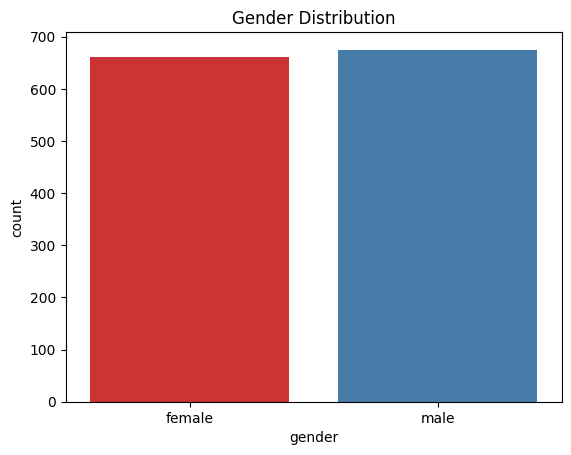

In [17]:
sns.countplot(x = 'gender',data=df, palette='Set1')
plt.title('Gender Distribution')
plt.show()

male and female both are same

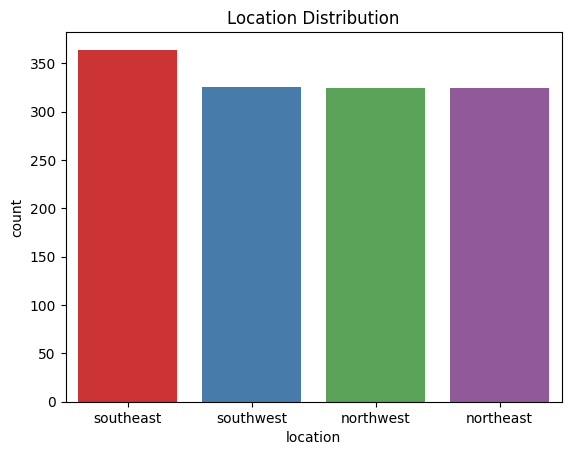

In [18]:
sns.countplot(x = 'location',data=df,order=df['location'].value_counts().index, palette='Set1')
plt.title('Location Distribution')
plt.show()

southeast people buying insurance more then other region

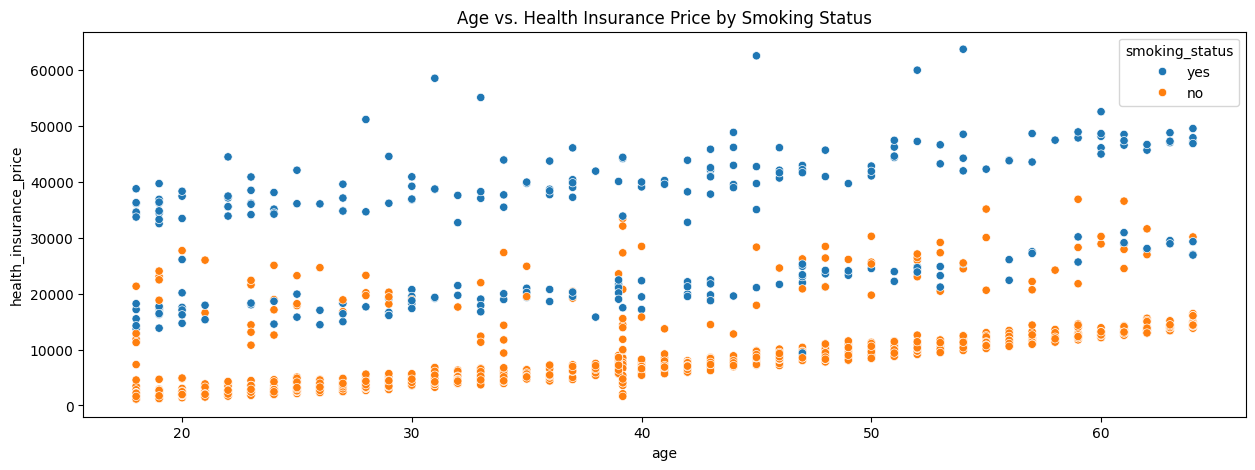

In [19]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='age', y='health_insurance_price', hue='smoking_status', data=df)
plt.title('Age vs. Health Insurance Price by Smoking Status')
plt.show()

above we can see.when age growing then heath insurance price growing

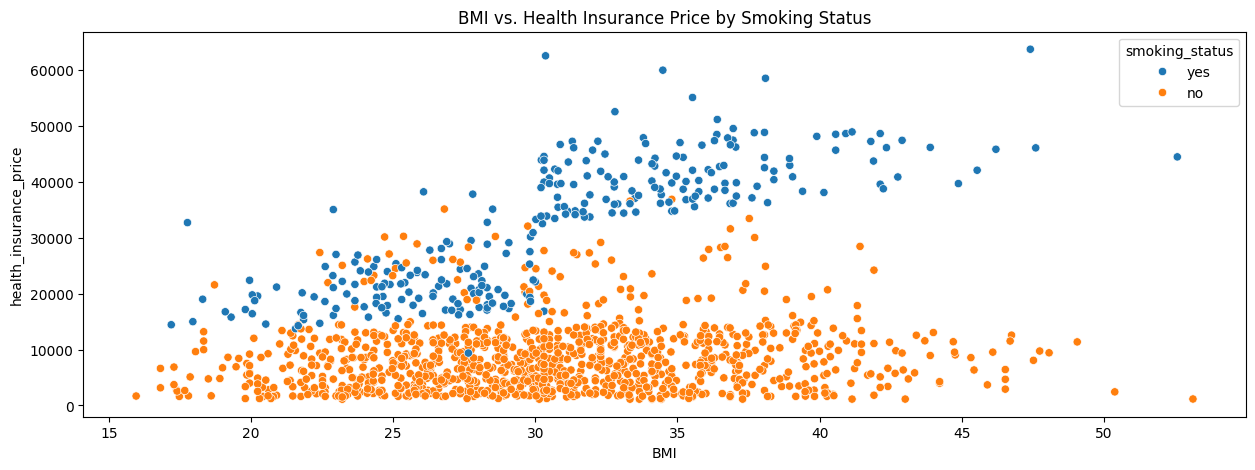

In [20]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='BMI', y='health_insurance_price', hue='smoking_status', data=df)
plt.title('BMI vs. Health Insurance Price by Smoking Status')
plt.show()

who bmi index 18-30 they are not much smoker.

<Axes: ylabel='health_insurance_price'>

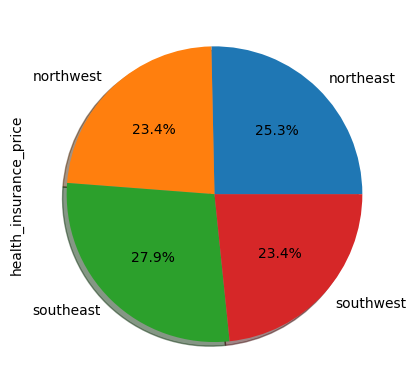

In [21]:
df.groupby('location')['health_insurance_price'].mean().plot(kind='pie',autopct='%1.1f%%',shadow='true')

<Axes: ylabel='health_insurance_price'>

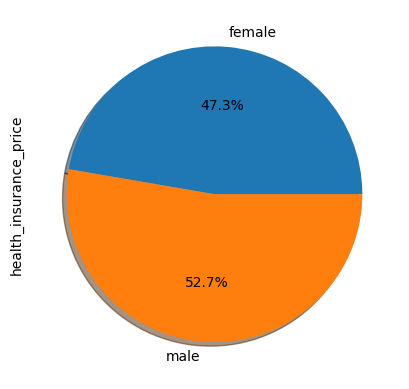

In [22]:
df.groupby('gender')['health_insurance_price'].mean().plot(kind='pie',autopct='%1.1f%%',shadow='true')

<Axes: ylabel='health_insurance_price'>

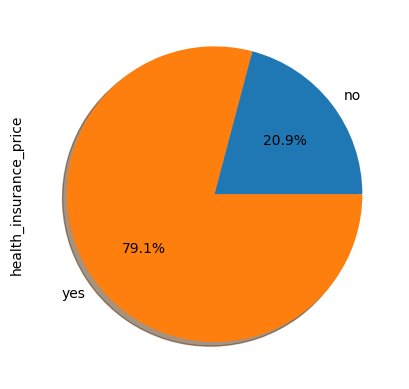

In [23]:
df.groupby('smoking_status')['health_insurance_price'].mean().plot(kind='pie',autopct='%1.1f%%',shadow='true')

In [24]:
df.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.9240
1,18.0,male,33.770,1,no,southeast,1725.5523


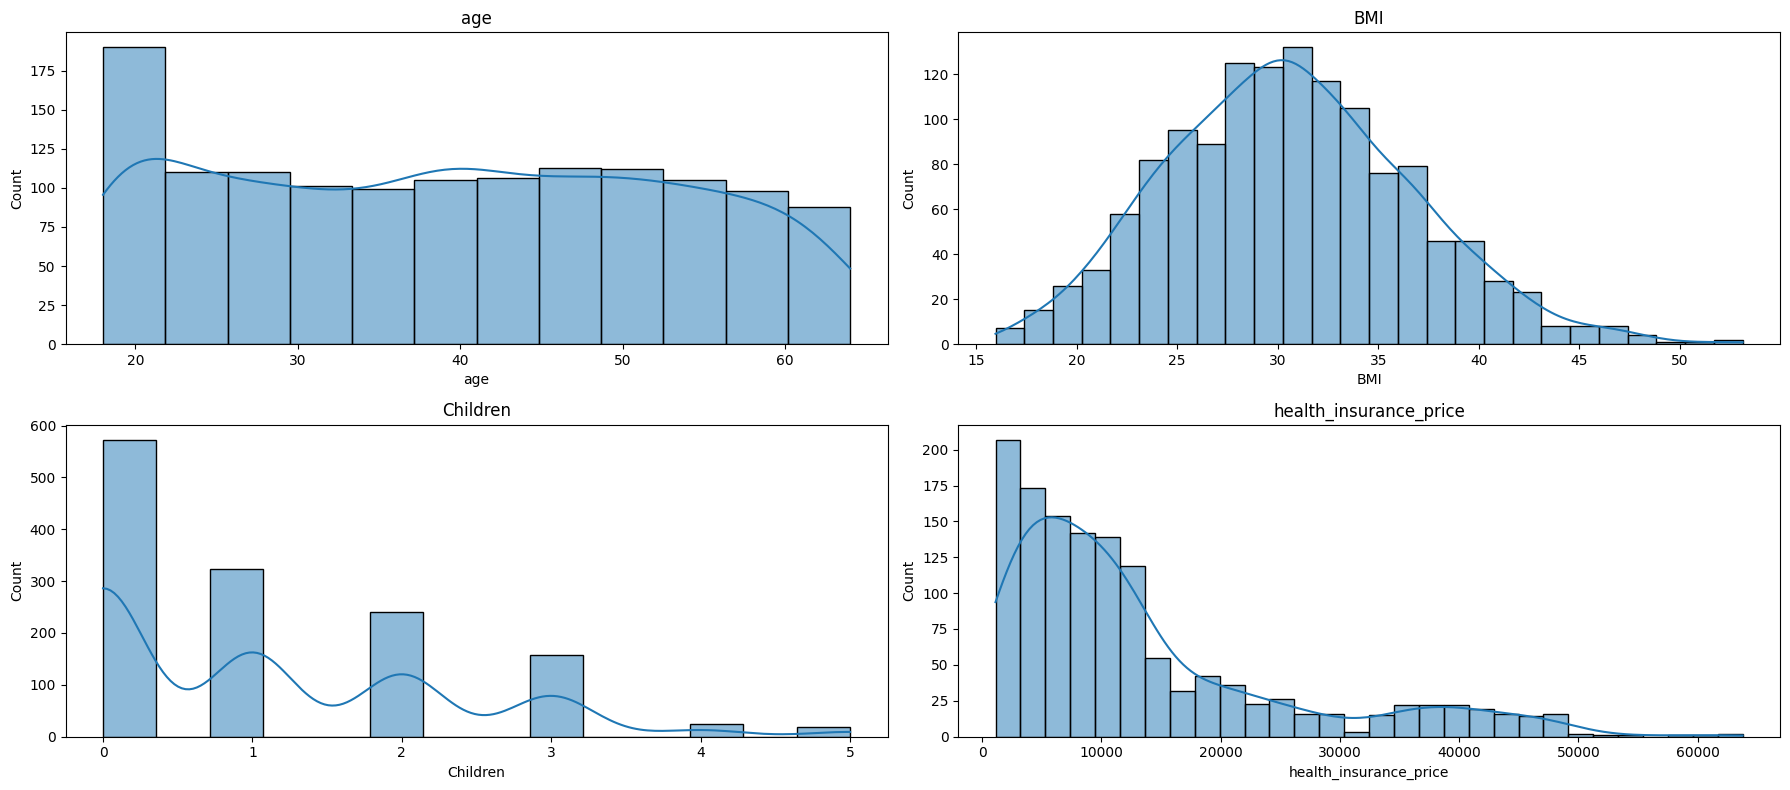

In [25]:
numrical_colums = df.select_dtypes(include=('int','float')).columns

plt.figure(figsize=(18,8))
for i,col in enumerate(numrical_colums):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(f"{col}")
plt.tight_layout()
plt.show()

# outliers

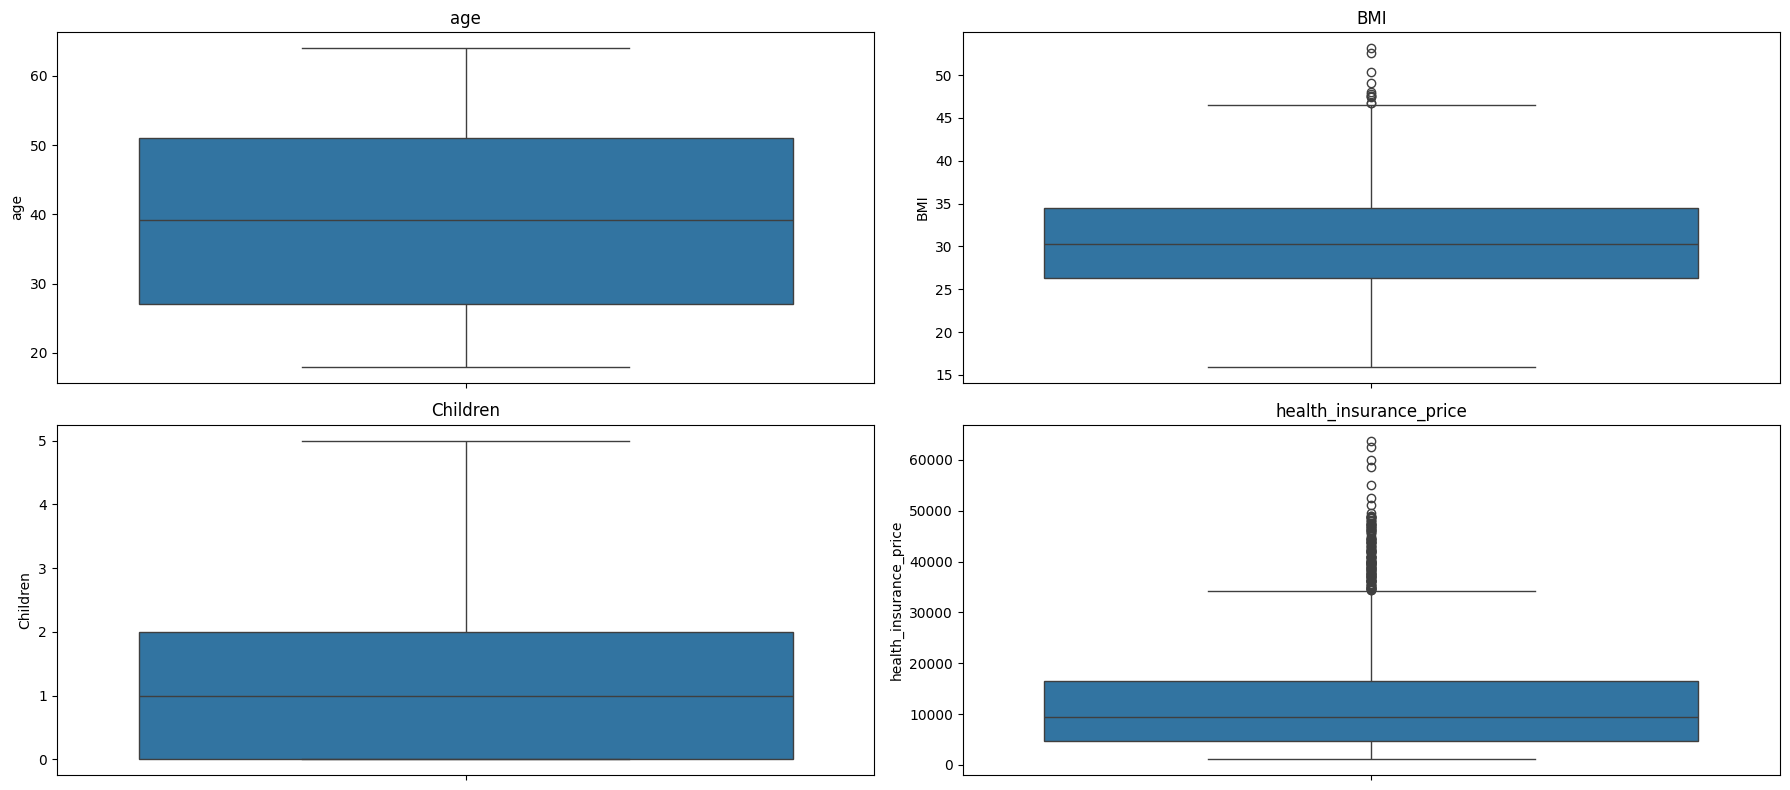

In [26]:
plt.figure(figsize=(18,8))
for i,col in enumerate(numrical_colums):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
  plt.title(f"{col}")
plt.tight_layout()
plt.show()

# removing outliers

In [27]:
df['BMI'].describe()

,BMI
count,1337.000000
mean,30.632521
std,6.059939
min,15.960000
25%,26.315000
50%,30.305000
75%,34.430000
max,53.130000


In [28]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)

print(q1,  q3)
iqr = q3-q1
print(iqr)

upper_bound = q3+(iqr*1.5)
print(upper_bound)

26.315 34.43
8.114999999999998
46.6025


<Axes: ylabel='BMI'>

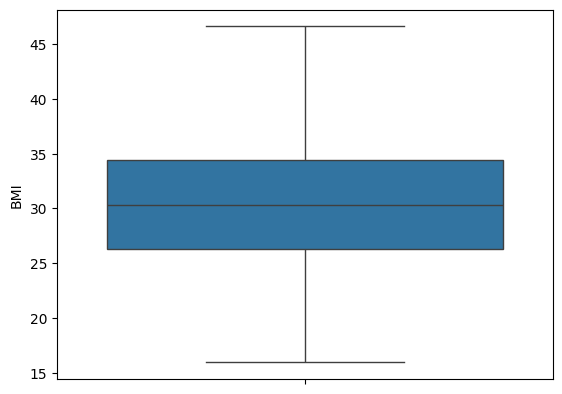

In [29]:
df['BMI'] =  np.where(df['BMI']>upper_bound,upper_bound,df['BMI'])
sns.boxplot(df['BMI'])

# encoding

In [30]:
df1 = df.copy()

In [31]:
df1.head(1)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.924


In [32]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
le = LabelEncoder()

In [33]:
ord = OrdinalEncoder()
df1['location'] = ord.fit_transform(df1[['location']])

In [34]:
df1['gender'] = le.fit_transform(df1['gender'])

In [35]:
df1['smoking_status'] = le.fit_transform(df1['smoking_status'])

In [36]:
df1.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,3.0,16884.92400
1,18.0,1,33.770,1,0,2.0,1725.55230
2,28.0,1,33.000,3,0,2.0,4449.46200
3,33.0,1,22.705,0,0,1.0,21984.47061
4,32.0,1,28.880,0,0,1.0,3866.85520


In [37]:
df1.skew()

,0
age,0.057062
gender,-0.019469
BMI,0.238318
Children,0.937421
smoking_status,1.463601
location,-0.039068
health_insurance_price,1.518941


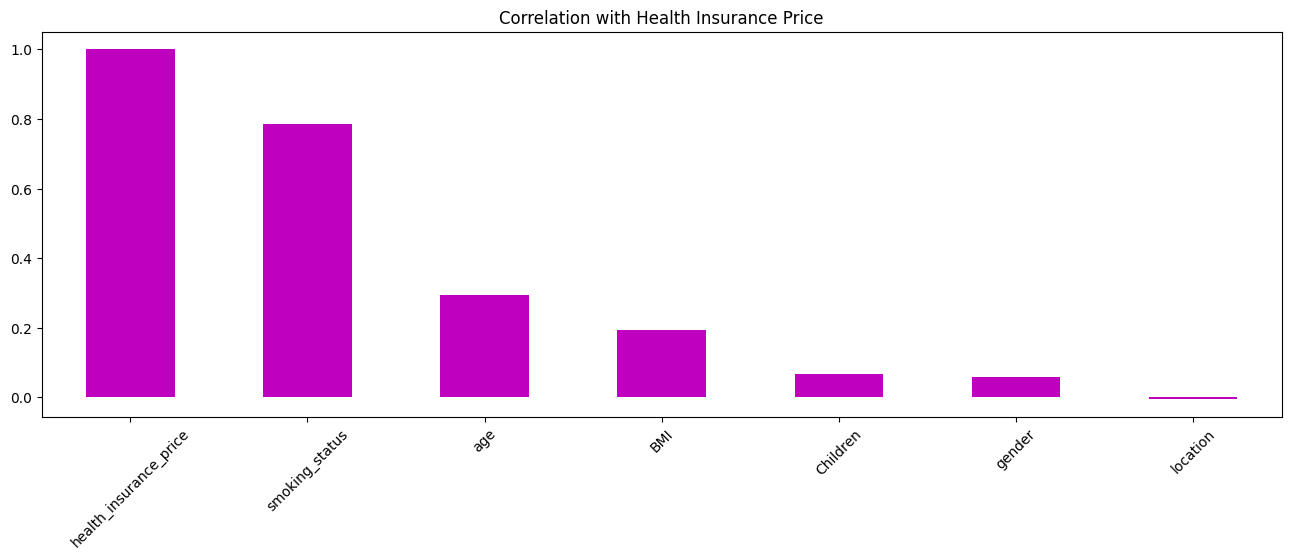

In [38]:
plt.figure(figsize=(16,5))
df1.corr()['health_insurance_price'].sort_values(ascending=False).plot(kind='bar',color='m')
plt.title('Correlation with Health Insurance Price')
plt.xticks(rotation=45)
plt.show()

# i am remove skewness

In [39]:
df1['health_insurance_price'] = np.log(df1['health_insurance_price'] + 1)

<Axes: xlabel='health_insurance_price', ylabel='Count'>

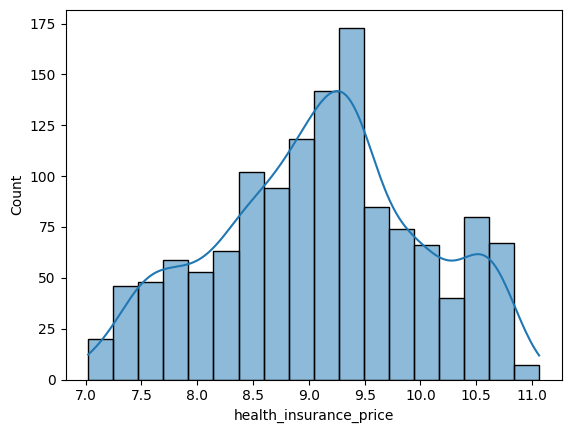

In [40]:
sns.histplot(df1['health_insurance_price'],kde=True)

<Axes: ylabel='health_insurance_price'>

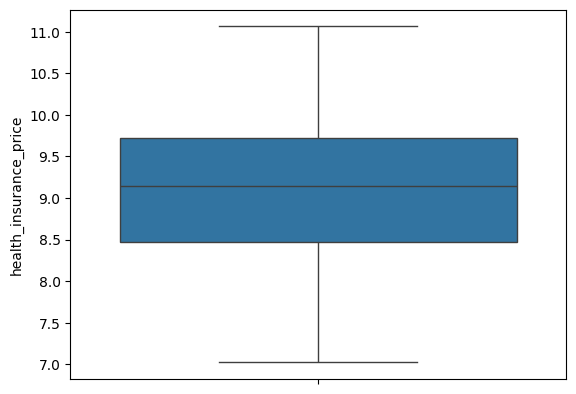

In [41]:
sns.boxplot(df1['health_insurance_price'])

## above can see when i remove skewness also remove remove outliers

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import accuracy_score ,roc_auc_score,roc_curve,r2_score,mean_squared_error,mean_absolute_error

# split data train and test

In [43]:
x = df1.drop(['health_insurance_price'],axis=1)
y = df1['health_insurance_price']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [44]:
x.head(2)

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,30.305,0,1,3.0
1,18.0,1,33.770,1,0,2.0


In [45]:
y.head(2)

,health_insurance_price
0,9.734236
1,7.453882


In [46]:
sc = StandardScaler()
sc.fit_transform(x_train)

array([[-1.16651755e+00,  9.71409473e-01, -1.00725201e+00,
        -9.07908040e-01, -5.00292312e-01, -1.38394601e+00],
       [-1.31074845e+00,  9.71409473e-01, -7.99601333e-01,
         7.66904203e-01, -5.00292312e-01, -1.38394601e+00],
       [ 4.41560714e-04, -1.02943200e+00,  1.18106664e+00,
         7.66904203e-01, -5.00292312e-01, -4.77982579e-01],
       ...,
       [-1.38286390e+00,  9.71409473e-01, -1.42927888e+00,
        -7.05019185e-02, -5.00292312e-01,  1.33394429e+00],
       [-8.47857899e-02, -1.02943200e+00, -4.20449696e-01,
         1.60431032e+00, -5.00292312e-01,  1.33394429e+00],
       [-3.01132141e-01, -1.02943200e+00,  9.01116539e-01,
         7.66904203e-01, -5.00292312e-01,  4.27980856e-01]])

In [47]:
sc.transform(x_test)

array([[ 0.70848417,  0.97140947, -1.34268771, -0.90790804, -0.50029231,
        -1.38394601],
       [-0.73382484, -1.029432  , -0.82398137,  2.44171645, -0.50029231,
         1.33394429],
       [ 0.85271507, -1.029432  ,  0.98938909,  1.60431032, -0.50029231,
        -0.47798258],
       ...,
       [-1.238633  , -1.029432  ,  0.68589965,  0.7669042 , -0.50029231,
        -1.38394601],
       [ 1.57386957,  0.97140947,  0.97509735, -0.07050192,  1.99883143,
         1.33394429],
       [ 0.56425326, -1.029432  , -1.03919826, -0.90790804, -0.50029231,
        -1.38394601]])

# Linear Regression model

In [48]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.737290950358396

In [49]:
lr_pred = lr.predict(x_test)
score = r2_score(y_test, lr_pred)
mse = mean_squared_error(y_test,lr_pred)
mae = mean_absolute_error(y_test,lr_pred)
print(f"r2 score:,{score}")
print(f"mean squre error:,{mse}")
print(f"mean absolute error:,{mae}")

r2 score:,0.8210059265869353
mean squre error:,0.1660864380744013
mean absolute error:,0.26993164383220064


# random forest regressor

In [50]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9685646020913468

In [51]:
rf_pred = rf.predict(x_test)
score_rf = r2_score(y_test, rf_pred)
mse = mean_squared_error(y_test,rf_pred)
mae = mean_absolute_error(y_test,rf_pred)
print(f"r2 score:,{score_rf}")
print(f"mean squre error:,{mse}")
print(f"mean absolute error:,{mae}")

r2 score:,0.8478785258080961
mean squre error:,0.14115167793771308
mean absolute error:,0.19969621830616788


# Gradient Boosting Regressor

In [52]:
Gbr = GradientBoostingRegressor()
Gbr.fit(x_train,y_train)
Gbr.score(x_train,y_train)

0.8652764395309864

In [53]:
gbr_pred = Gbr.predict(x_test)
score_gbr = r2_score(y_test, gbr_pred)
mse = mean_squared_error(y_test,gbr_pred)
mae = mean_absolute_error(y_test,gbr_pred)
print(f"r2 score:,{score_gbr}")
print(f"mean squre error:,{mse}")
print(f"mean absolute error:,{mae}")

r2 score:,0.8730638671257573
mean squre error:,0.1177825040238627
mean absolute error:,0.1998707426811833


# Hyperparameter Tuning

In [54]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=Gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8067357289854311


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_regressor = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 3, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 100)
Gradient_regressor.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=4)

In [56]:
y_pred = Gradient_regressor.predict(x_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"r2 score,  {r2}")
print(f"mean squared error,  {mse}")

r2 score,  0.8777451179639555
mean squared error,  0.11343882793099609


In [57]:
feature_importances = Gradient_regressor.feature_importances_

In [58]:
feature_importances_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

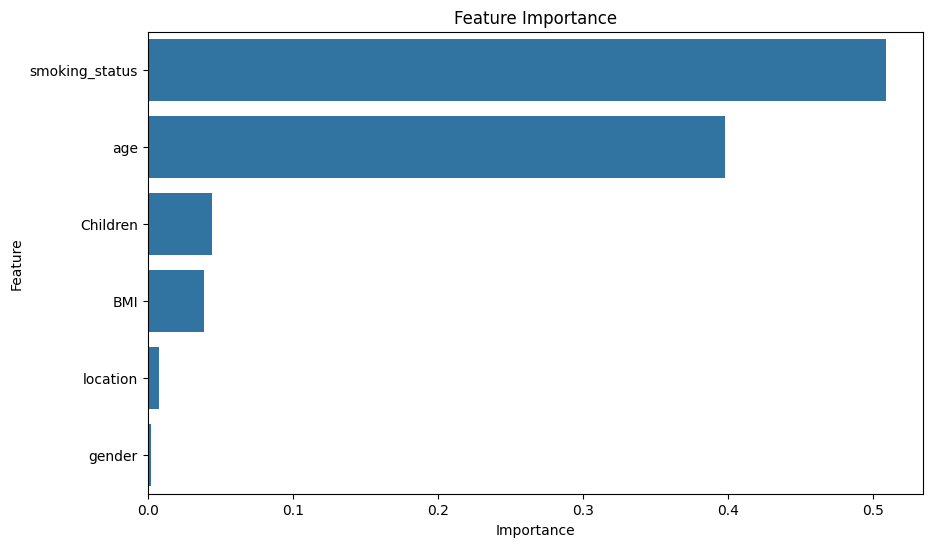

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()

In [60]:
import joblib
joblib.dump(Gradient_regressor,"health_insurance.pkl")

['health_insurance.pkl']

# thanks You